# eksperimen operasi morfologi pada kanal terpisah

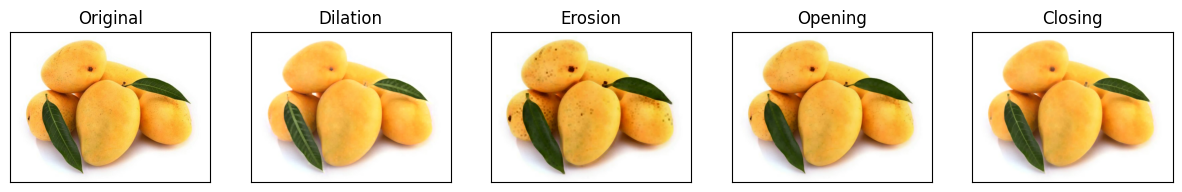

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca gambar warna (HAPUS angka 0)
img = cv2.imread('Image_1.jpg') 

# 2. Memisahkan kanal warna B, G, R
b, g, r = cv2.split(img)

# 3. Membuat elemen struktural
kernel = np.ones((5,5), np.uint8)

# --- Lakukan 4 Operasi pada SETIAP KANAL ---

# A. Dilasi
dilation_b = cv2.dilate(b, kernel, iterations=1)
dilation_g = cv2.dilate(g, kernel, iterations=1)
dilation_r = cv2.dilate(r, kernel, iterations=1)
# Gabungkan kembali
dilated_img = cv2.merge((dilation_b, dilation_g, dilation_r))

# B. Erosi
erosion_b = cv2.erode(b, kernel, iterations=1)
erosion_g = cv2.erode(g, kernel, iterations=1)
erosion_r = cv2.erode(r, kernel, iterations=1)
# Gabungkan kembali
eroded_img = cv2.merge((erosion_b, erosion_g, erosion_r))

# C. Opening
opening_b = cv2.morphologyEx(b, cv2.MORPH_OPEN, kernel)
opening_g = cv2.morphologyEx(g, cv2.MORPH_OPEN, kernel)
opening_r = cv2.morphologyEx(r, cv2.MORPH_OPEN, kernel)
# Gabungkan kembali
opening_img = cv2.merge((opening_b, opening_g, opening_r))

# D. Closing
closing_b = cv2.morphologyEx(b, cv2.MORPH_CLOSE, kernel)
closing_g = cv2.morphologyEx(g, cv2.MORPH_CLOSE, kernel)
closing_r = cv2.morphologyEx(r, cv2.MORPH_CLOSE, kernel)
# Gabungkan kembali
closing_img = cv2.merge((closing_b, closing_g, closing_r))

# --- Menampilkan hasil ---
# Konversi BGR ke RGB untuk Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dilated_rgb = cv2.cvtColor(dilated_img, cv2.COLOR_BGR2RGB)
eroded_rgb = cv2.cvtColor(eroded_img, cv2.COLOR_BGR2RGB)
opening_rgb = cv2.cvtColor(opening_img, cv2.COLOR_BGR2RGB)
closing_rgb = cv2.cvtColor(closing_img, cv2.COLOR_BGR2RGB)


# Siapkan plot
titles = ['Original', 'Dilation', 'Erosion', 'Opening', 'Closing']
images = [img_rgb, dilated_rgb, eroded_rgb, opening_rgb, closing_rgb]

plt.figure(figsize=(15, 5)) # Beri ruang lebih
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

# Penggunaan Opening dan Closing pada Citra Warna Kompleks

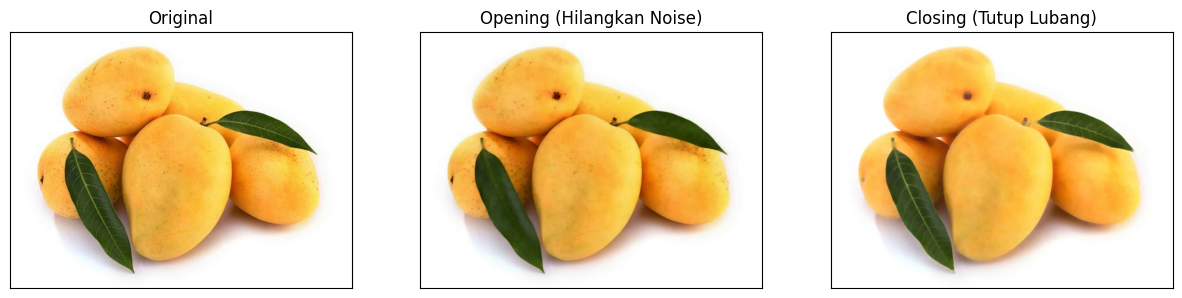

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca gambar warna
# Ganti 'Image_1.jpg' dengan nama file gambar Anda
img = cv2.imread('Image_1.jpg') 

# 2. Memisahkan kanal warna B, G, R [cite: 374]
b, g, r = cv2.split(img)

# 3. Membuat elemen struktural [cite: 377]
kernel = np.ones((5,5), np.uint8)

# --- Terapkan OPENING (per-kanal) ---
# Opening = Erosi lalu Dilasi. Berguna untuk menghilangkan noise 
opening_b = cv2.morphologyEx(b, cv2.MORPH_OPEN, kernel)
opening_g = cv2.morphologyEx(g, cv2.MORPH_OPEN, kernel)
opening_r = cv2.morphologyEx(r, cv2.MORPH_OPEN, kernel)
# Gabungkan kembali
opening_img = cv2.merge((opening_b, opening_g, opening_r))

# --- Terapkan CLOSING (per-kanal) ---
# Closing = Dilasi lalu Erosi. Berguna untuk menutup lubang 
closing_b = cv2.morphologyEx(b, cv2.MORPH_CLOSE, kernel)
closing_g = cv2.morphologyEx(g, cv2.MORPH_CLOSE, kernel)
closing_r = cv2.morphologyEx(r, cv2.MORPH_CLOSE, kernel)
# Gabungkan kembali
closing_img = cv2.merge((closing_b, closing_g, closing_r))

# --- Menampilkan hasil ---
# Konversi BGR ke RGB untuk Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
opening_rgb = cv2.cvtColor(opening_img, cv2.COLOR_BGR2RGB)
closing_rgb = cv2.cvtColor(closing_img, cv2.COLOR_BGR2RGB)

# Siapkan plot
titles = ['Original', 'Opening (Hilangkan Noise)', 'Closing (Tutup Lubang)']
images = [img_rgb, opening_rgb, closing_rgb]

plt.figure(figsize=(15, 7)) # Ukuran disesuaikan untuk 3 gambar
for i in range(3):
    plt.subplot(1, 3, i+1) # Layout 1 baris, 3 kolom
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()